In [41]:
#####FINAL#####
#This script pulls in Diabetes Patient datasets from UCI ML Repository, builds and tests several predictive models and subsequently makes predictions for risks/likelihood of unplanned admission for patients with poorly managed diabetes conditions. This is likely due to various different reasons including non-compliance with medication, loss to follow-up on outpatient or GP appointments etc. The objective is to identify and predict such patient cohorts at an earlier stage, to permit clinicians to intervene and optimise the health of such identified patient cohorts. This will also reduce the likelihood of an avoidable hospital presentation/admission for these patients. 
# Author = "Dr Adaeze Nwobodo" email "AdaezeNwobodo@gmail.com"

#imported library packages {caret/Dplyr/lubridate/mgcv/purrr/ranger/rpart/rpart.plot/sigr/tidyselect/tidyverse/wrapr/base/broom/cluster/datasets/ellipsis/ggplot2/graphics/grDevices/highr/lattice/maggritr/methods/nlme/readr/readxl/renv/rstats/stringr/tibble/tidyr/utils}

<img src="TimeSeriesForecasting.png" style="width:1000px; height:300px" />

In [42]:
# DEFINE HELPER FUNCTIONS

In [3]:
# 1
load_file <- function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}

print(load_file)

function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}


In [44]:
# 2
clean_data_nofullduplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}

print(clean_data_nofullduplicates)

function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}


In [45]:
# 3
clean_datanopartialduplicates <- function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}

print(clean_datanopartialduplicates)

function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}


In [46]:
# 4 
get_levels <- function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}

print(get_levels)

function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}


In [47]:
first_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.25))
}

print(first_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.25))
}


In [48]:
third_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.75))
}

print(third_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.75))
}


In [49]:
get_wday_month <- function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}

print(get_wday_month)

function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}


In [50]:
calculate_test_train_split <- function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}

print(calculate_test_train_split)

function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}


In [51]:
train_model_lm <- function(data_frame) {
    #train specific model-types using Date & Time-specific datasets
    return (vars <- c("Time", "wday", "month", "Code"))
    lm(Value ~ vars, data = data_frame)
}

print(train_model_lm)

function(data_frame) {
    #train specific model-types using Date & Time-specific datasets
    return (vars <- c("Time", "wday", "month", "Code"))
    lm(Value ~ vars, data = data_frame)
}


In [8]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("vtreat"); library(vtreat)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'purrr'

The following object is masked from 'package:caret':

    lift

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyver

In [11]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
install.packages("mlbench"); library(mlbench)
install.packages("yardstick"); library(yardstick)
install.packages("wrapr"); library(wrapr)
library(rpart)
library(parsnip)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)
install.packages("xts"); library(xts)
install.packages("forecast"); library(forecast)
install.packages("astsa"); library(astsa)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'chron'

The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'data.table'

The following object is masked from 'package:wrapr':

    :=

The following object is masked from 'package:purrr':

    transpose

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'psych'

The following object is masked from 'package:randomForest'

ERROR: Error in library(brotools): there is no package called 'brotools'


In [28]:
install.packages("xts"); library(xts)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last

The following objects are masked from 'package:dplyr':

    first, last



In [94]:
install.packages("forecast"); library(forecast)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify

Attaching package: 'forecast'

The following object is masked from 'package:yardstick':

    accuracy

The following object is masked from 'package:Metrics':

    accuracy

The following object is masked from 'package:nlme':

    getResponse



In [116]:
install.packages("prophet"); library(prophet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [118]:
install.packages("anomalize"); library(anomalize)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
== Use anomalize to improve your Forecasts by 50%! =============================
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>


In [4]:
#Loading files
D1 <- load_file("data-01")
D1$pid <- c("D1")

In [5]:
head(D1, n = 10)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1
04-22-1991,7:35,58,216,D1
04-22-1991,7:35,33,10,D1
04-22-1991,7:35,34,13,D1
04-22-1991,13:40,33,2,D1


In [6]:
nrow(D1)

[1] 943

In [12]:
#Conversion of Date column to "mdy" format
D2 <- D1 %>%
    mutate(Date1 = mdy(Date))

head(D2)
str(D2)

Date,Time,Code,Value,pid,Date1
04-21-1991,9:09,58,100,D1,1991-04-21
04-21-1991,9:09,33,9,D1,1991-04-21
04-21-1991,9:09,34,13,D1,1991-04-21
04-21-1991,17:08,62,119,D1,1991-04-21
04-21-1991,17:08,33,7,D1,1991-04-21
04-21-1991,22:51,48,123,D1,1991-04-21


'data.frame':	943 obs. of  6 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: int  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...
 $ Date1: Date, format: "1991-04-21" "1991-04-21" ...


In [33]:
#Convert Time column to datetime format
D2$datetime = paste(D2$Date, D2$Time)
D2$datetime = mdy_hm(D2$datetime)
head(D2)

Date,Time,Code,Value,pid,Date1,datetime
04-21-1991,9:09,58,100,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,62,119,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00


In [35]:
#Removing original Date and Time columns
D3 <- D2 %>%
    select(-Date, -Time)

head(D3)
str(D3)

Code,Value,pid,Date1,datetime
58,100,D1,1991-04-21,1991-04-21 09:09:00
33,9,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-21,1991-04-21 09:09:00
62,119,D1,1991-04-21,1991-04-21 17:08:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
48,123,D1,1991-04-21,1991-04-21 22:51:00


'data.frame':	943 obs. of  5 variables:
 $ Code    : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value   : int  100 9 13 119 7 123 216 10 13 2 ...
 $ pid     : chr  "D1" "D1" "D1" "D1" ...
 $ Date1   : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime: POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 09:09:00" ...


In [36]:
#Filtering out Insulin doses and corresponding codes
target <- c(33, 34, 35)

Insulin_data <- D3 %>%
    filter(Code %in% target) %>%
    rename(Insulin_Code = Code, Insulin_dose = Value)

head(Insulin_data)

Insulin_Code,Insulin_dose,pid,Date1,datetime
33,9,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-21,1991-04-21 09:09:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
33,10,D1,1991-04-22,1991-04-22 07:35:00
34,13,D1,1991-04-22,1991-04-22 07:35:00
33,2,D1,1991-04-22,1991-04-22 13:40:00


In [37]:
#Filtering out Glucose doses and corresponding codes
target2 <- c(48, 58, 60, 62, 65)

Glucose_data <- D3 %>%
    filter(Code %in% target2) %>%
    rename(Glucose_Code = Code, Glucose_dose = Value)

head(Glucose_data)

Glucose_Code,Glucose_dose,pid,Date1,datetime
58,100,D1,1991-04-21,1991-04-21 09:09:00
62,119,D1,1991-04-21,1991-04-21 17:08:00
48,123,D1,1991-04-21,1991-04-21 22:51:00
58,216,D1,1991-04-22,1991-04-22 07:35:00
62,211,D1,1991-04-22,1991-04-22 16:56:00
58,257,D1,1991-04-23,1991-04-23 07:25:00


In [38]:
#Inner join Insulin and Glucose data
Diabetes_InsGlucose <- Insulin_data %>%
    inner_join(Glucose_data, by = c("pid", "Date1", "datetime"))

head(Diabetes_InsGlucose)
str(Diabetes_InsGlucose)
nrow(Diabetes_InsGlucose)

Insulin_Code,Insulin_dose,pid,Date1,datetime,Glucose_Code,Glucose_dose
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211


'data.frame':	430 obs. of  7 variables:
 $ Insulin_Code: int  33 34 33 33 34 33 33 34 33 33 ...
 $ Insulin_dose: int  9 13 7 10 13 7 11 13 7 10 ...
 $ pid         : chr  "D1" "D1" "D1" "D1" ...
 $ Date1       : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime    : POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 09:09:00" ...
 $ Glucose_Code: int  58 58 62 58 58 62 58 58 62 58 ...
 $ Glucose_dose: int  100 100 119 216 216 211 257 257 129 239 ...


[1] 430

In [39]:
#Converting columns to numeric

Diabetes_InsGlucose$Insulin_Code <- as.numeric(as.character(Diabetes_InsGlucose$Insulin_Code))
Diabetes_InsGlucose$Insulin_dose <- as.numeric(as.character(Diabetes_InsGlucose$Insulin_dose))
Diabetes_InsGlucose$Glucose_Code <- as.numeric(as.character(Diabetes_InsGlucose$Glucose_Code))
Diabetes_InsGlucose$Glucose_dose <- as.numeric(as.character(Diabetes_InsGlucose$Glucose_dose))

str(Diabetes_InsGlucose)

'data.frame':	430 obs. of  7 variables:
 $ Insulin_Code: num  33 34 33 33 34 33 33 34 33 33 ...
 $ Insulin_dose: num  9 13 7 10 13 7 11 13 7 10 ...
 $ pid         : chr  "D1" "D1" "D1" "D1" ...
 $ Date1       : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime    : POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 09:09:00" ...
 $ Glucose_Code: num  58 58 62 58 58 62 58 58 62 58 ...
 $ Glucose_dose: num  100 100 119 216 216 211 257 257 129 239 ...


In [41]:
#Convert dataframe to an xts object
Diabetes_InsGlucose_xts <- as.xts(Diabetes_InsGlucose[ , -3], order.by = Diabetes_InsGlucose$datetime)

head(Diabetes_InsGlucose_xts)
str(Diabetes_InsGlucose_xts)
class(Diabetes_InsGlucose_xts)

Warning message:
"timezone of object (UTC) is different than current timezone ()."

                    Insulin_Code Insulin_dose Date1       
1991-04-21 09:09:00 "33"         " 9"         "1991-04-21"
1991-04-21 09:09:00 "34"         "13"         "1991-04-21"
1991-04-21 17:08:00 "33"         " 7"         "1991-04-21"
1991-04-22 07:35:00 "33"         "10"         "1991-04-22"
1991-04-22 07:35:00 "34"         "13"         "1991-04-22"
1991-04-22 16:56:00 "33"         " 7"         "1991-04-22"
                    datetime              Glucose_Code Glucose_dose
1991-04-21 09:09:00 "1991-04-21 09:09:00" "58"         "100"       
1991-04-21 09:09:00 "1991-04-21 09:09:00" "58"         "100"       
1991-04-21 17:08:00 "1991-04-21 17:08:00" "62"         "119"       
1991-04-22 07:35:00 "1991-04-22 07:35:00" "58"         "216"       
1991-04-22 07:35:00 "1991-04-22 07:35:00" "58"         "216"       
1991-04-22 16:56:00 "1991-04-22 16:56:00" "62"         "211"       

An 'xts' object on 1991-04-21 09:09:00/1991-09-03 07:20:00 containing:
  Data: chr [1:430, 1:6] "33" "34" "33" "33" "34" "33" "33" "34" "33" "33" "34" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "Insulin_Code" "Insulin_dose" "Date1" "datetime" ...
  Indexed by objects of class: [POSIXct,POSIXt] TZ: UTC
  xts Attributes:  
 NULL


[1] "xts" "zoo"

In [43]:
#Extract core of time series object
Diabetes_core <- coredata(Diabetes_InsGlucose_xts)

#View class of Diabetes_core
class(Diabetes_core)

#Extract index 
Diabetes_index <- index(Diabetes_InsGlucose_xts)

#View class of Diabetes_index
class(Diabetes_index)

[1] "matrix"

[1] "POSIXct" "POSIXt"

In [44]:
#Extract periodicity of ts object
periodicity(Diabetes_InsGlucose_xts)

#How many monthly periods are in the data?
nmonths(Diabetes_InsGlucose_xts)

#Extract Insulin/Glucose values for 13 May 1991
Diabetes_InsGlucose_xts["1991-05-13"]

#View data for the first 3 days of the last month of the first year for the xts object
first(last(first(Diabetes_InsGlucose_xts, "1 year"), "1 month"), "3 days")

Hourly periodicity from 1991-04-21 09:09:00 to 1991-09-03 07:20:00 

[1] 6

Warning message:
"timezone of object (UTC) is different than current timezone ()."

                    Insulin_Code Insulin_dose Date1       
1991-05-13 07:50:00 "33"         "10"         "1991-05-13"
1991-05-13 07:50:00 "34"         "14"         "1991-05-13"
1991-05-13 17:00:00 "33"         " 8"         "1991-05-13"
                    datetime              Glucose_Code Glucose_dose
1991-05-13 07:50:00 "1991-05-13 07:50:00" "58"         "108"       
1991-05-13 07:50:00 "1991-05-13 07:50:00" "58"         "108"       
1991-05-13 17:00:00 "1991-05-13 17:00:00" "62"         "300"       

Warning message:
"timezone of object (UTC) is different than current timezone ()."

                    Insulin_Code Insulin_dose Date1       
1991-09-01 09:02:00 "33"         " 9"         "1991-09-01"
1991-09-01 09:02:00 "34"         "16"         "1991-09-01"
1991-09-01 17:41:00 "33"         " 7"         "1991-09-01"
1991-09-02 08:51:00 "33"         " 9"         "1991-09-02"
1991-09-02 08:51:00 "34"         "16"         "1991-09-02"
1991-09-02 17:30:00 "33"         " 7"         "1991-09-02"
1991-09-03 07:20:00 "33"         " 9"         "1991-09-03"
1991-09-03 07:20:00 "34"         "16"         "1991-09-03"
                    datetime              Glucose_Code Glucose_dose
1991-09-01 09:02:00 "1991-09-01 09:02:00" "58"         "183"       
1991-09-01 09:02:00 "1991-09-01 09:02:00" "58"         "183"       
1991-09-01 17:41:00 "1991-09-01 17:41:00" "62"         "249"       
1991-09-02 08:51:00 "1991-09-02 08:51:00" "58"         "168"       
1991-09-02 08:51:00 "1991-09-02 08:51:00" "58"         "168"       
1991-09-02 17:30:00 "1991-09-02 17:30:00" "62"         " 61" 

In [47]:
#Data save to RDS file format (maintain class of data object)

saveRDS(object = Diabetes_InsGlucose_xts, file = "Diabetes_InsGlucose_xts.rds")

#Read in xts data from rds file
Diabetes_InsGlucose_xts2 <- readRDS("Diabetes_InsGlucose_xts.rds")

#Check class of the new xts2 object
class(Diabetes_InsGlucose_xts2)

#Examine first 5 rows of new xts object
head(Diabetes_InsGlucose_xts2)

[1] "xts" "zoo"

Warning message:
"timezone of object (UTC) is different than current timezone ()."

                    Insulin_Code Insulin_dose Date1       
1991-04-21 09:09:00 "33"         " 9"         "1991-04-21"
1991-04-21 09:09:00 "34"         "13"         "1991-04-21"
1991-04-21 17:08:00 "33"         " 7"         "1991-04-21"
1991-04-22 07:35:00 "33"         "10"         "1991-04-22"
1991-04-22 07:35:00 "34"         "13"         "1991-04-22"
1991-04-22 16:56:00 "33"         " 7"         "1991-04-22"
                    datetime              Glucose_Code Glucose_dose
1991-04-21 09:09:00 "1991-04-21 09:09:00" "58"         "100"       
1991-04-21 09:09:00 "1991-04-21 09:09:00" "58"         "100"       
1991-04-21 17:08:00 "1991-04-21 17:08:00" "62"         "119"       
1991-04-22 07:35:00 "1991-04-22 07:35:00" "58"         "216"       
1991-04-22 07:35:00 "1991-04-22 07:35:00" "58"         "216"       
1991-04-22 16:56:00 "1991-04-22 16:56:00" "62"         "211"       

In [48]:
#Save data to CSV file format

#Export xts object to csv file using write.zoo
write.zoo(Diabetes_InsGlucose_xts, file = "Diabetes_InsGlucose_xts.csv", sep = ",")

#Open saved object using read.zoo
Diabetes_InsGlucose2 <- read.zoo("Diabetes_InsGlucose_xts.csv", sep = ",", FUN = as.Date, header = TRUE, index.column = 1)

#Encoding new object back into xts
Diabetes_InsGlucose_xts3 <- as.xts(Diabetes_InsGlucose2)

head(Diabetes_InsGlucose_xts3)

Warning message in zoo(rval3, ix):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"

           Insulin_Code Insulin_dose Date1        datetime             
1991-04-21 "33"         " 9"         "1991-04-21" "1991-04-21 09:09:00"
1991-04-21 "34"         "13"         "1991-04-21" "1991-04-21 09:09:00"
1991-04-21 "33"         " 7"         "1991-04-21" "1991-04-21 17:08:00"
1991-04-22 "33"         "10"         "1991-04-22" "1991-04-22 07:35:00"
1991-04-22 "34"         "13"         "1991-04-22" "1991-04-22 07:35:00"
1991-04-22 "33"         " 7"         "1991-04-22" "1991-04-22 16:56:00"
           Glucose_Code Glucose_dose
1991-04-21 "58"         "100"       
1991-04-21 "58"         "100"       
1991-04-21 "62"         "119"       
1991-04-22 "58"         "216"       
1991-04-22 "58"         "216"       
1991-04-22 "62"         "211"       

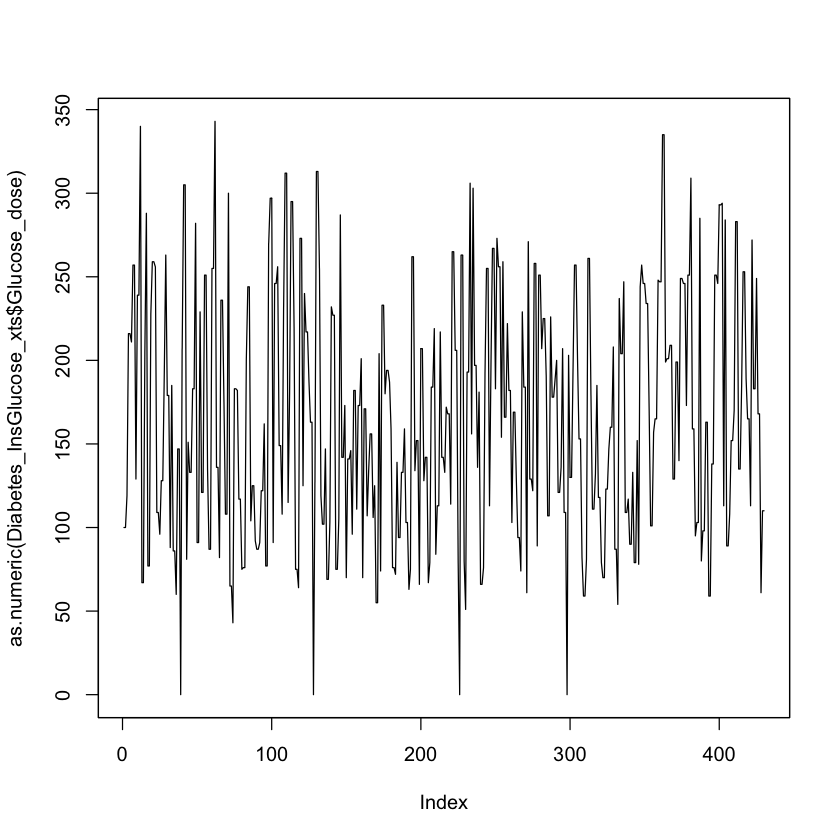

In [51]:
plot.zoo(as.numeric(Diabetes_InsGlucose_xts$Glucose_dose))

In [52]:
#GLUCOSE

In [56]:
#Calculate average glucose readings for each day
Glucose_data2 <- Glucose_data %>%
    mutate(day = floor_date(datetime, "day")) %>%
    group_by(day) %>%
    summarise(avg = mean(Glucose_dose))

head(Glucose_data2)
str(Glucose_data2)
class(Glucose_data2)
nrow(Glucose_data2)

day,avg
1991-04-21,114.0
1991-04-22,213.5
1991-04-23,193.0
1991-04-24,236.0
1991-04-25,187.0
1991-04-26,152.5


tibble [136 x 2] (S3: tbl_df/tbl/data.frame)
 $ day: POSIXct[1:136], format: "1991-04-21" "1991-04-22" ...
 $ avg: num [1:136] 114 214 193 236 187 ...


[1] "tbl_df"     "tbl"        "data.frame"

[1] 136

In [57]:
#Calculate max & min glucose readings for each day
Glucose_data3 <- Glucose_data %>%
    mutate(day = floor_date(datetime, "day")) %>%
    group_by(day) %>%
    summarise(max = max(Glucose_dose), min = min(Glucose_dose))

head(Glucose_data3)
str(Glucose_data3)
class(Glucose_data3)
nrow(Glucose_data3)

day,max,min
1991-04-21,123,100
1991-04-22,216,211
1991-04-23,257,129
1991-04-24,340,129
1991-04-25,288,67
1991-04-26,228,77


tibble [136 x 3] (S3: tbl_df/tbl/data.frame)
 $ day: POSIXct[1:136], format: "1991-04-21" "1991-04-22" ...
 $ max: int [1:136] 123 216 257 340 288 228 259 200 263 185 ...
 $ min: int [1:136] 100 211 129 129 67 77 256 96 0 0 ...


[1] "tbl_df"     "tbl"        "data.frame"

[1] 136

In [119]:
#DETECT ANOMALIES WITHIN THE DATA

In [122]:
Glucose_anomalised <- Glucose_data2 %>%
    time_decompose(avg, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Glucose_anomalised %>% glimpse()

Converting from tbl_df to tbl_time.
Auto-index message: index = day
frequency = 7 days
trend = 68 days


Rows: 136
Columns: 11
$ day           <dttm> 1991-04-21, 1991-04-22, 1991-04-23, 1991-04-24, 1991-04~
$ avg           <dbl> 114.00000, 213.50000, 193.00000, 236.00000, 187.00000, 1~
$ observed      <dbl> 114.00000, 213.50000, 193.00000, 236.00000, 187.00000, 1~
$ season        <dbl> 5.435342, -5.578785, -20.421749, 3.944019, -15.798437, 1~
$ trend         <dbl> 155.9499, 155.3935, 154.8370, 154.2806, 153.7242, 153.16~
$ remainder     <dbl> -47.385220, 63.685322, 58.584702, 77.775349, 49.074221, ~
$ remainder_l1  <dbl> -257.2207, -257.2207, -257.2207, -257.2207, -257.2207, -~
$ remainder_l2  <dbl> 257.2828, 257.2828, 257.2828, 257.2828, 257.2828, 257.28~
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "N~
$ recomposed_l1 <dbl> -95.83546, -107.40600, -122.80538, -98.99603, -119.29490~
$ recomposed_l2 <dbl> 418.6681, 407.0975, 391.6981, 415.5075, 395.2086, 427.25~


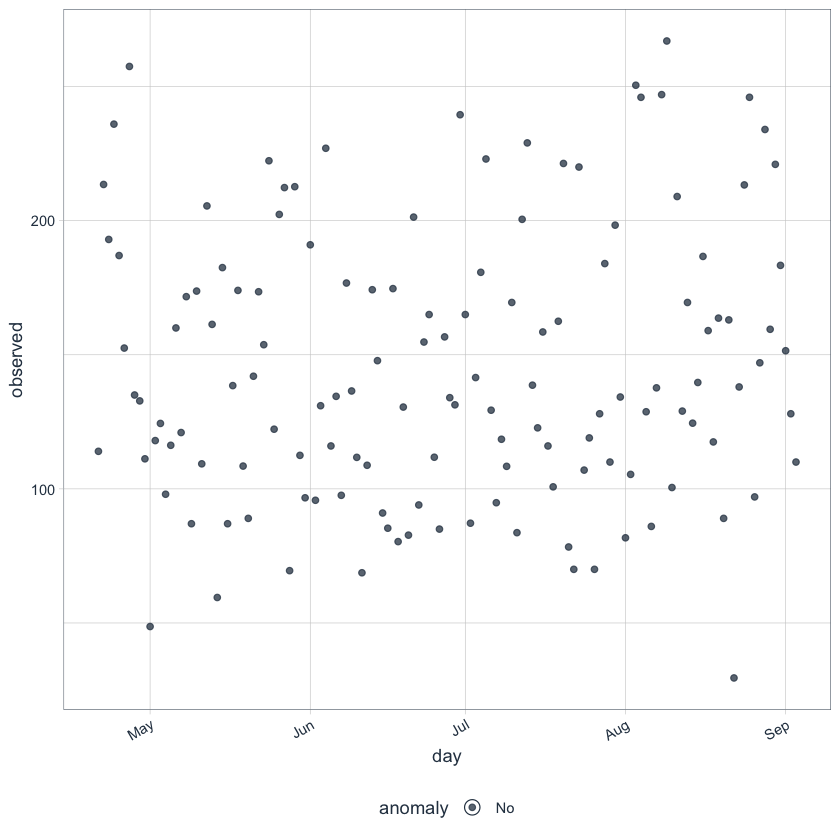

In [123]:
#Visualise the Anomalies
Glucose_anomalised %>% plot_anomalies(ncol = 3, alpha_dots = 0.75)

#Plot below suggest no anomalies exist in the glucose data (this is supported by outputs from Grubbs' test in EDA section)

In [66]:
#Convert Glucose dataframe into xts object
Glucose_xts <- as.xts(Glucose_data3[, -1], order.by = Glucose_data3$day)
class(Glucose_xts)

[1] "xts" "zoo"

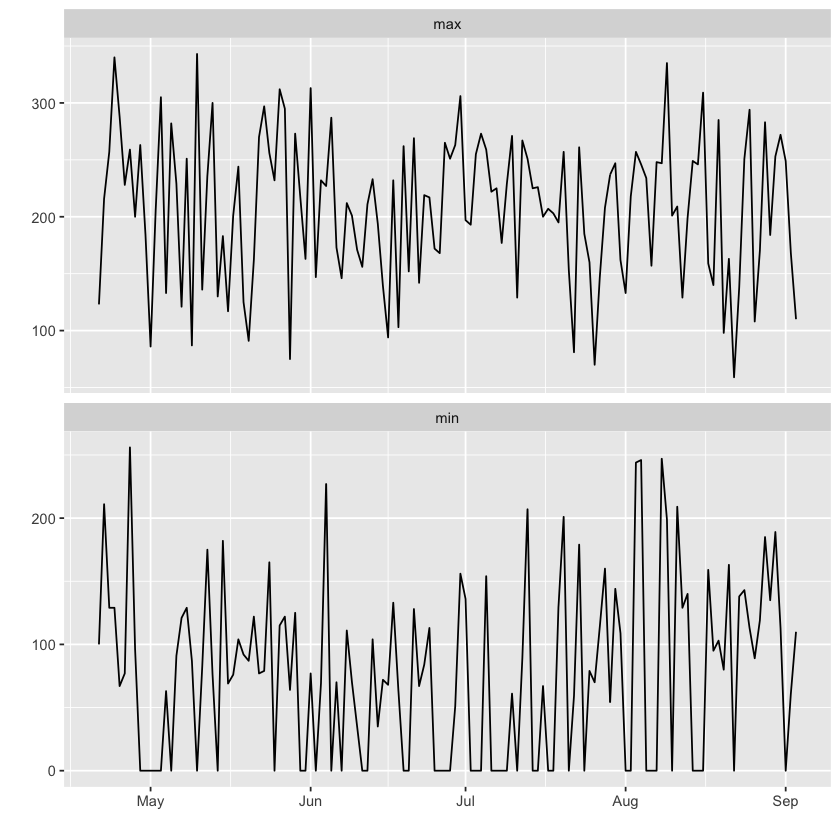

In [67]:
autoplot(Glucose_xts, facet = TRUE)

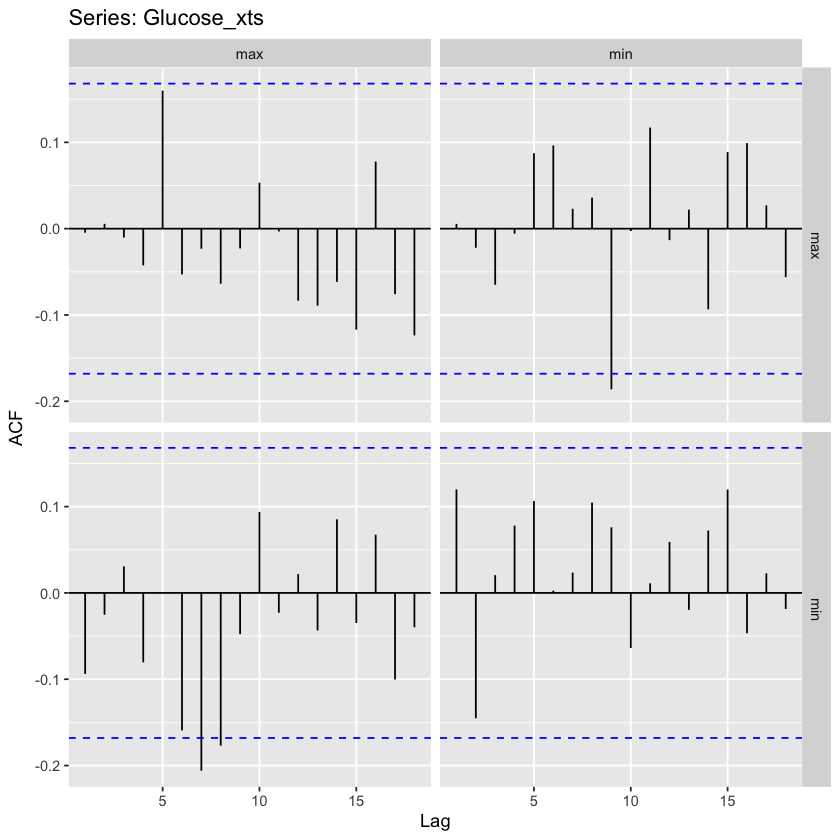

In [95]:
#AUTOCORRELATION
ggAcf(Glucose_xts)

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."

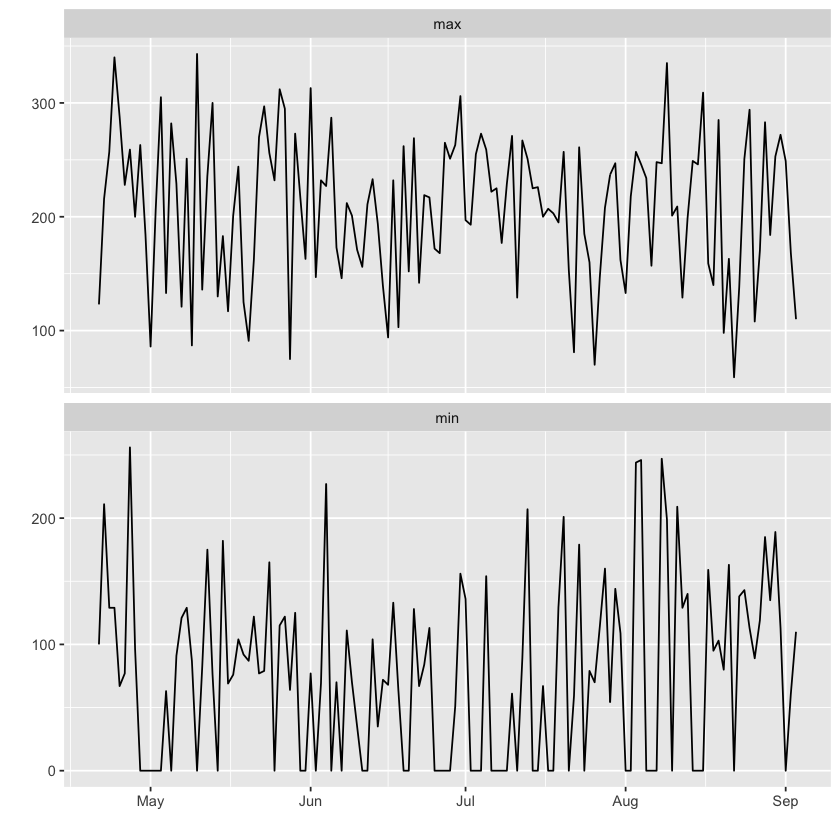

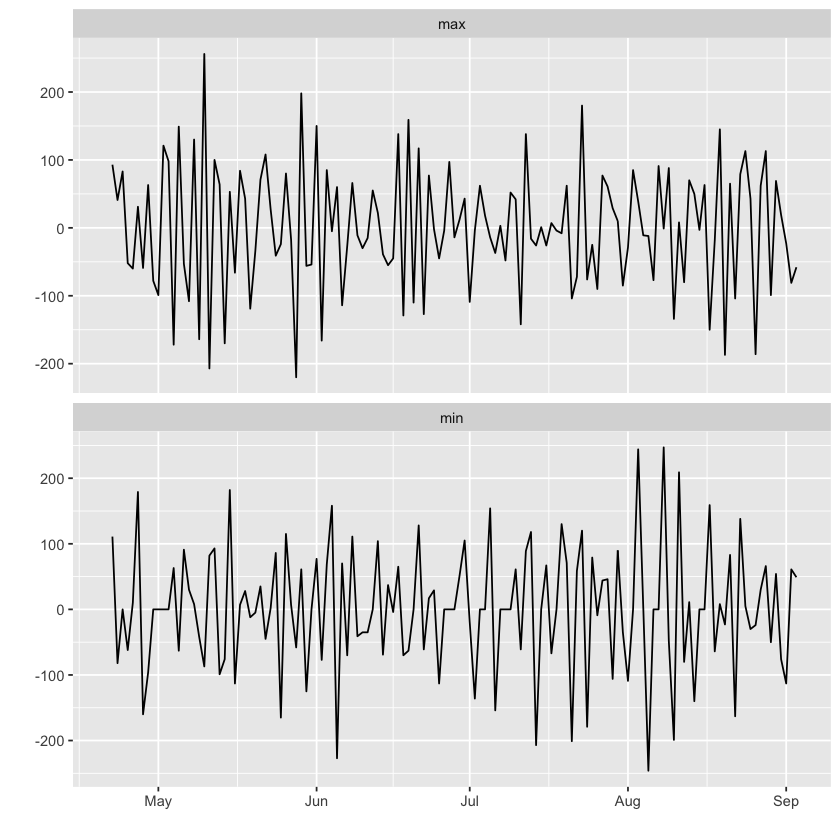

ERROR: Error in Box.test(diff(Glucose_xts, lag = 10, type = "Ljung")): x is not a vector or univariate time series


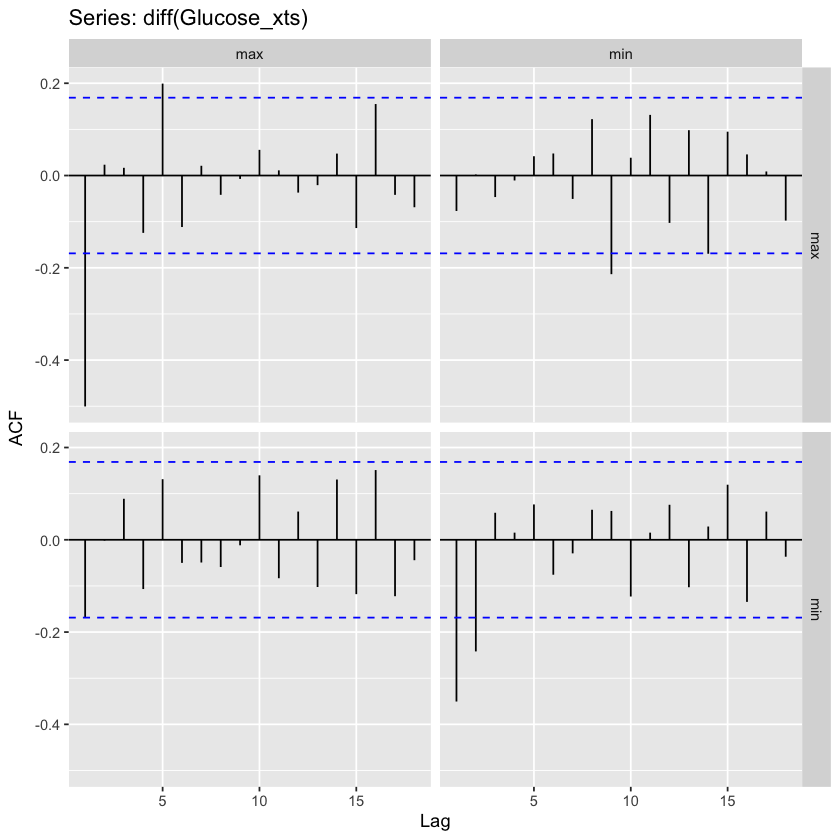

In [166]:
#Check for White Noise within time series

#Plot original time series
autoplot(Glucose_xts)

#Plot the differenced time series
autoplot(diff(Glucose_xts)) #to make time series more stationary - 

#ACF of differenced time series
ggAcf(diff(Glucose_xts))

#Ljung-Box test of the differenced series
Box.test(diff(Glucose_xts, lag = 10, type = "Ljung")) #p-value of 0.95 implies the data is not significantly different from white noise

In [97]:
#Convert Glucose average values dataframe into xts object
Glucose_xts2 <- as.xts(Glucose_data2[, -1], order.by = Glucose_data2$day)
class(Glucose_xts2)

[1] "xts" "zoo"

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

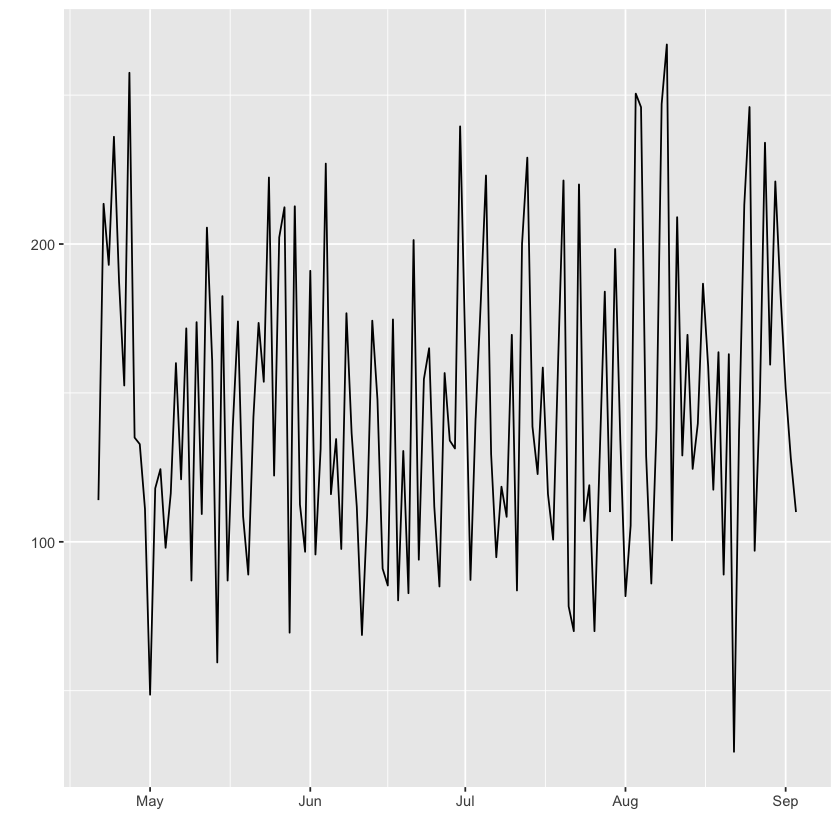

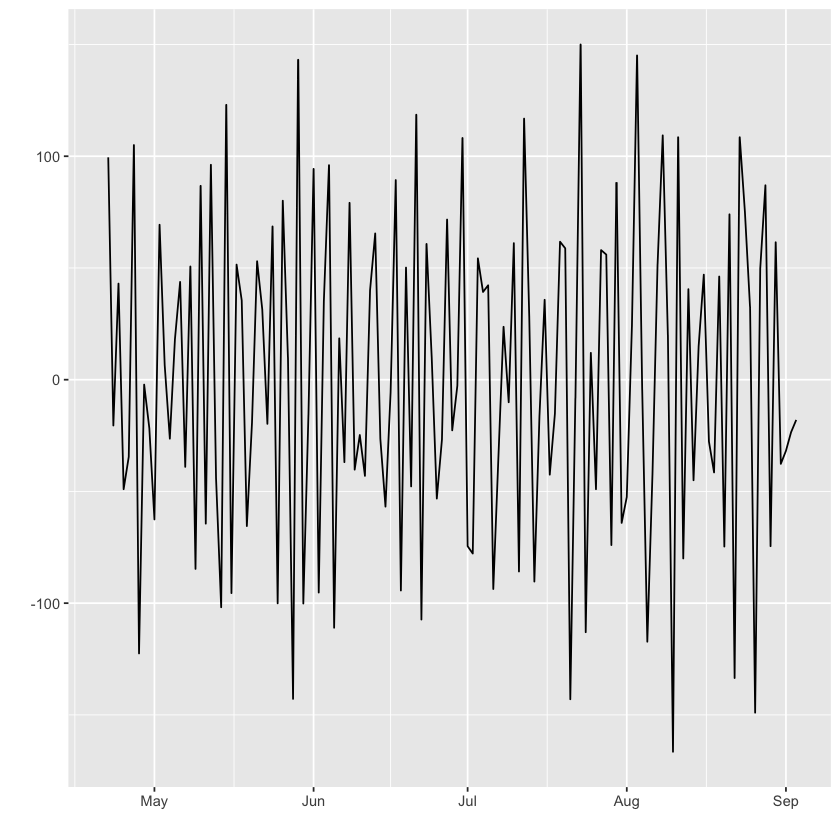


	Box-Pierce test

data:  diff(Glucose_xts2, lag = 10, type = "Ljung")
X-squared = 0.0018634, df = 1, p-value = 0.9656


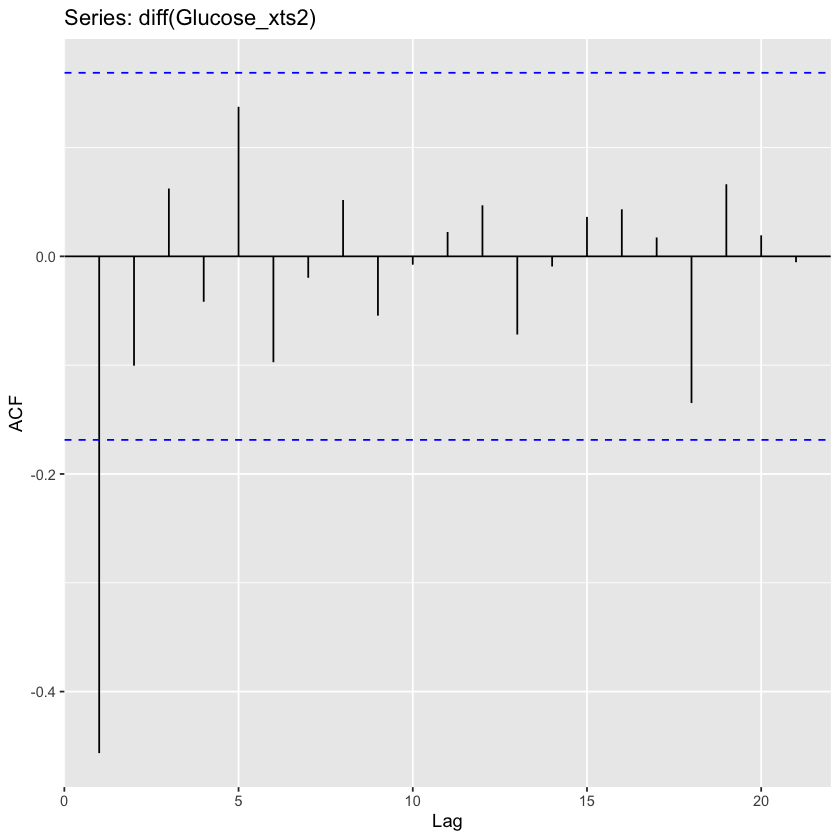

In [98]:
#Check for White Noise within time series

#Plot original time series
autoplot(Glucose_xts2)

#Plot the differenced time series
autoplot(diff(Glucose_xts2)) #to make time series more stationary. No difference in pattern noted

#ACF of differenced time series
ggAcf(diff(Glucose_xts2)) #plot time series against lags of its differenced self. Only 1 significant signal spike in ACF graph. Implies data
#likely white noise

#Ljung-Box test of the differenced series
Box.test(diff(Glucose_xts2, lag = 10, type = "Ljung")) #p-value of 0.95 implies the data is mot significantly different from white noise


Forecast method: Naive method

Model Information:
Call: naive(y = Glucose_xts, h = 20) 

Residual sd: 132.8628 

Error measures:
                    ME     RMSE      MAE  MPE MAPE      MASE      ACF1
Training set -65.65926 132.8628 107.4296 -Inf  Inf 0.7536782 0.1657498

Forecasts:
         Point Forecast      Lo 80    Hi 80      Lo 95     Hi 95
11750401            110  -60.27054 280.2705  -150.4063  370.4063
11836801            110 -130.79891 350.7989  -258.2701  478.2701
11923201            110 -184.91723 404.9172  -341.0370  561.0370
12009601            110 -230.54108 450.5411  -410.8126  630.8126
12096001            110 -270.73650 490.7365  -472.2862  692.2862
12182401            110 -307.07594 527.0759  -527.8626  747.8626
12268801            110 -340.49351 560.4935  -578.9704  798.9704
12355201            110 -371.59782 591.5978  -626.5403  846.5403
12441601            110 -400.81162 620.8116  -671.2190  891.2190
12528001            110 -428.44273 648.4427  -713.4771  933.4771
1

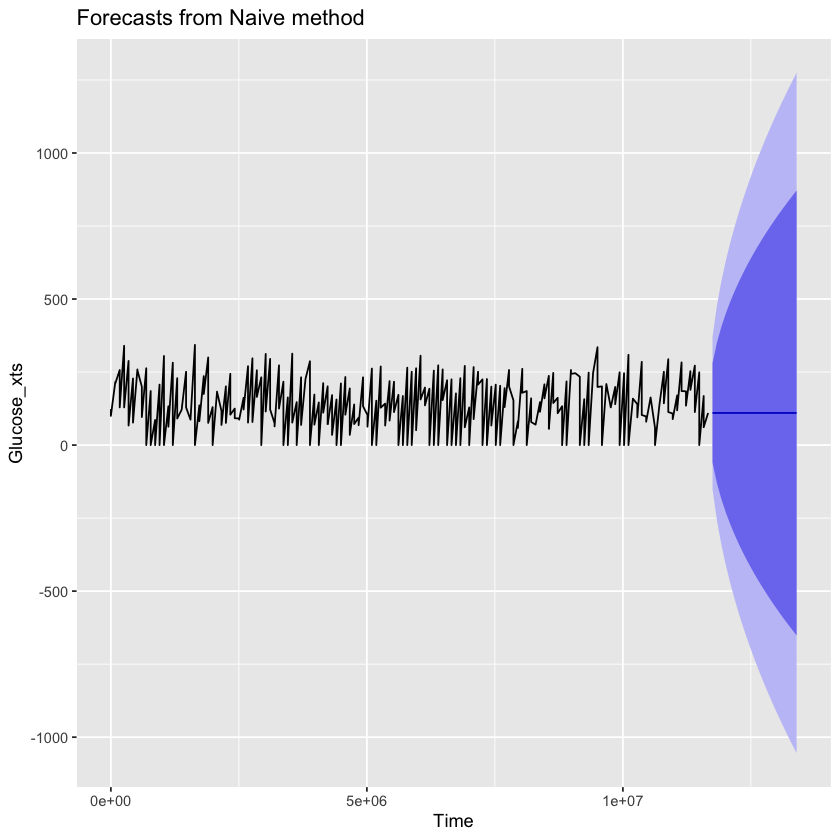

In [99]:
#Naively forecast time series - baseline model. Use most recent observation to forecast future observations
fcGlucose <- naive(Glucose_xts, h = 20)

#Plot and summarise forecasts
autoplot(fcGlucose)
summary(fcGlucose)
#A good model should forecast well (with low RMSE on test set) and use all available information in training data (should have white noise residuals)
#Model below is not a good model


	Ljung-Box test

data:  Residuals from Naive method
Q* = 35.899, df = 10, p-value = 8.76e-05

Model df: 0.   Total lags used: 10



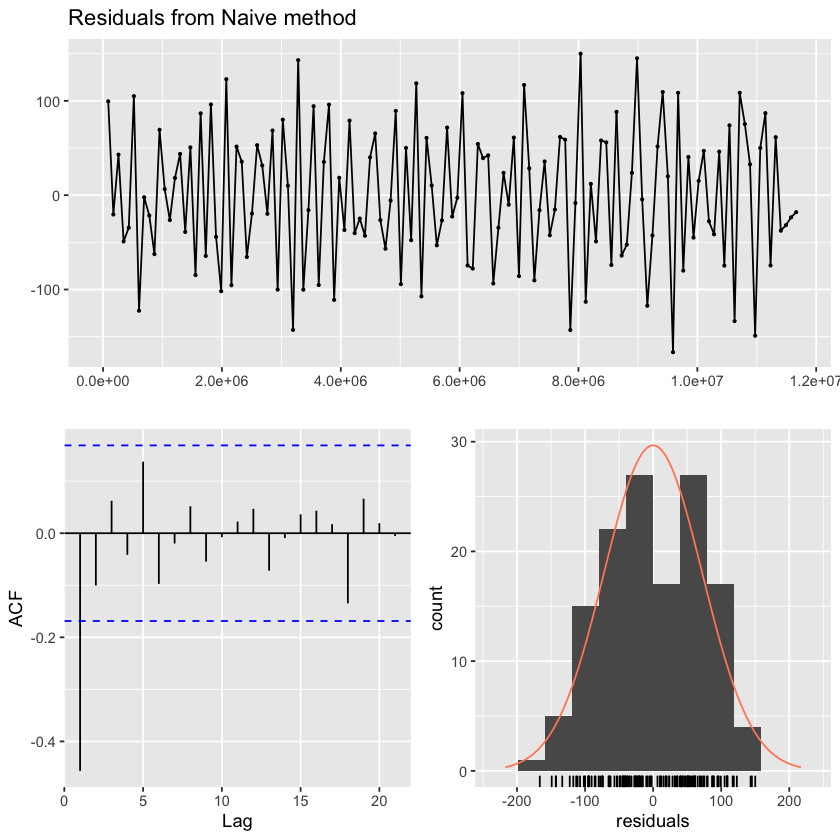

In [102]:
#Check residuals for naive model above, using time plot, acf plot, histogram and Ljung box test results

Glucose_xts2 %>% naive() %>% checkresiduals()

#p-value < 0.05 implies the residuals contain important information not used by the model during training. Residuals therefore not white noise.

h=1      h=2      h=3      h=4      h=5      h=6      h=7      h=8 
5197.861 5615.501 4996.230 4937.014 4449.590 5544.148 5349.074 5202.033

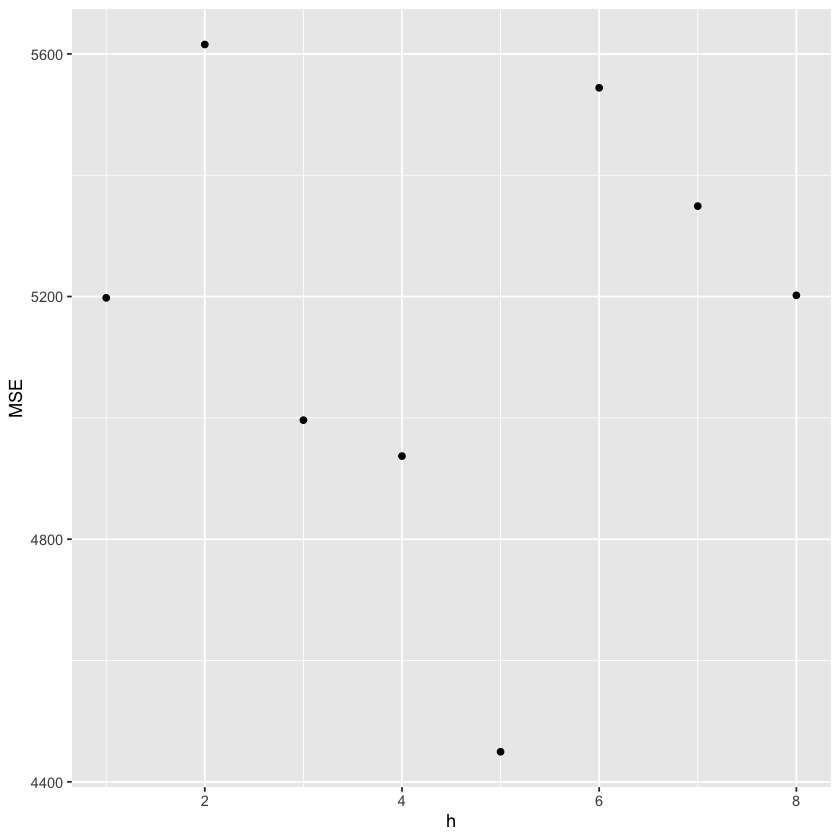

In [106]:
#Use of tsCV() for time series cross validation and plot of MSE values

#Compute cross validated errors for up to 8 steps ahead
e <- tsCV(Glucose_xts2, forecastfunction = naive, h = 8)

#Compute the MSE values and remove missing values
mse <- colMeans(e^2, na.rm = TRUE)
mse #resulting mean squared errors below. no significant change in MSE with forecast horizon (should increase with time)

#Plot MSE values against forecast horizon
data.frame(h = 1:8, MSE = mse) %>%
    ggplot(aes(x = h, y = MSE)) + geom_point() #showing no correlation between forecast horizon and MSE

#With time series cv, can choose model with lowest computed MSE below i.e. 4449 (h = 5)

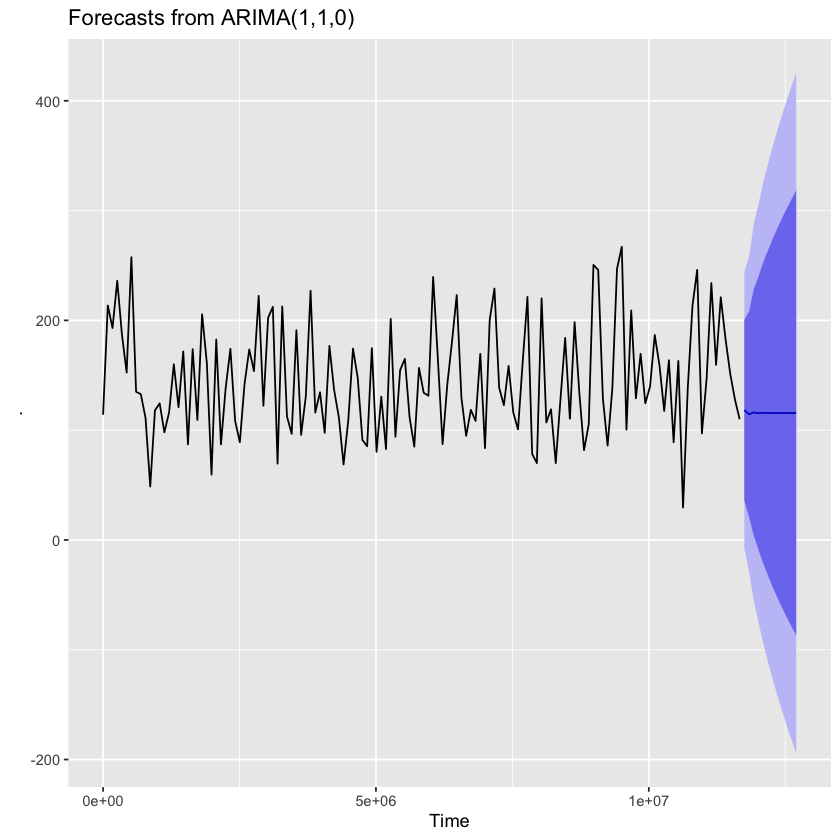

In [103]:
#Fit a random ARIMA (1, 1, 0) model to the data and forecast 12 months ahead
Glucose_xts2 %>%
    Arima(order = c(1,1, 0)) %>%
    forecast(h = 12) %>%
    autoplot()


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 6.5329, df = 9, p-value = 0.6856

Model df: 1.   Total lags used: 10



Series: Glucose_xts2 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
          mean
      145.2312
s.e.    4.3529

sigma^2 estimated as 2596:  log likelihood=-727.07
AIC=1458.14   AICc=1458.23   BIC=1463.97

Training set error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set 4.806271e-14 50.76362 42.19744 -15.36434 35.43734 0.2905535
                     ACF1
Training set -0.004278414

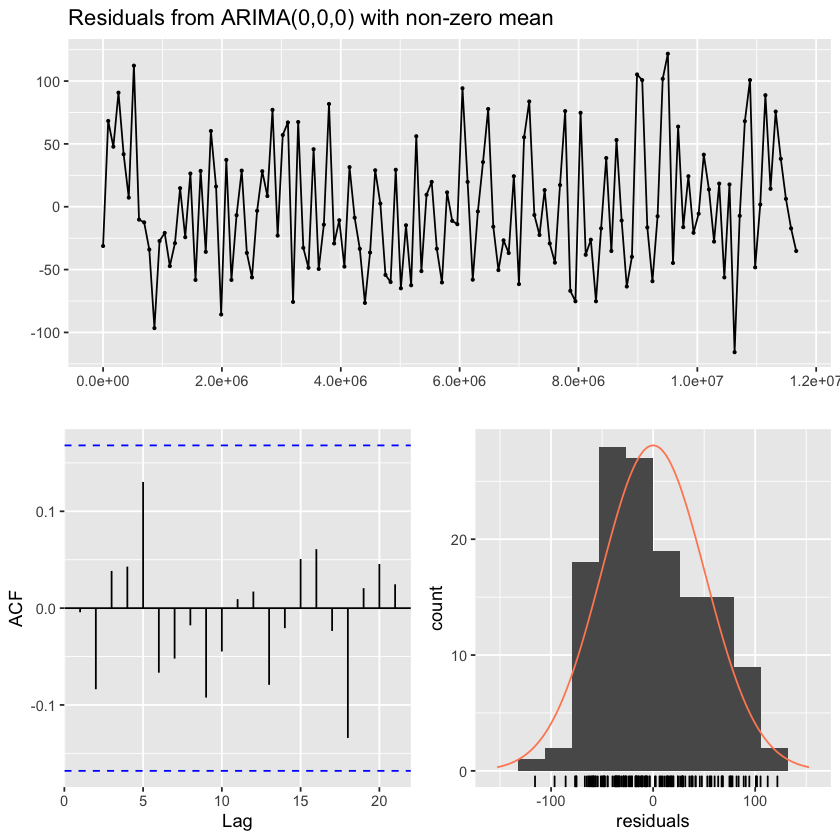

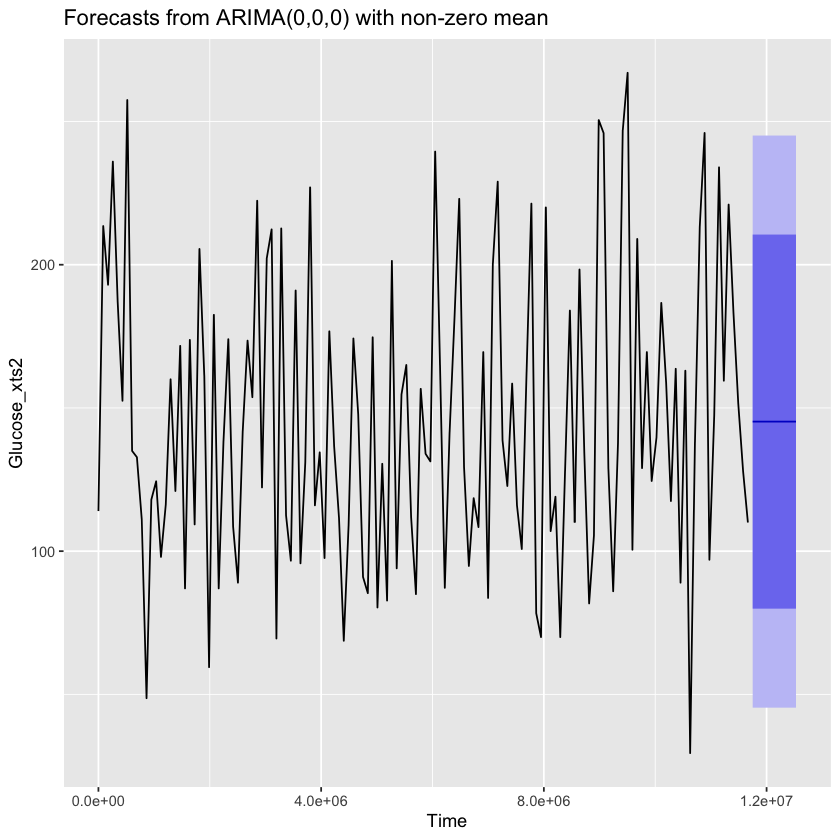

In [105]:
#Fit an automatic ARIMA model to the data
fit <- auto.arima(Glucose_xts2) #automatic ARIMA model used. Best performing ARIMA model chosen - an ARIMA (0, 0, 0) i.e. a white noise error
#model

#Check residuals look like white noise
checkresiduals(fit)
residualsok <- TRUE #Residuals look like white noise as p-value (0.6858) is > 0.05

#Summarise the model
summary(fit) #AICc of 1458.23 and number of differenes of 0 (p, d, q). auto.arima() finds values of p and q to use by minimising the AICc


#Plot forecasts of fit for next 10 periods
fit %>%
    forecast(h = 10) %>%
    autoplot()

In [109]:
#Filter for Regular Insulin  
target3 <- 33

Insulin_data2 <- Insulin_data %>%
    filter(Insulin_Code %in% target3) %>%
    mutate(Reg_Insulin = Insulin_dose)
    

head(Insulin_data2)
str(Insulin_data2)

Insulin_Code,Insulin_dose,pid,Date1,datetime,Reg_Insulin
33,9,D1,1991-04-21,1991-04-21 09:09:00,9
33,7,D1,1991-04-21,1991-04-21 17:08:00,7
33,10,D1,1991-04-22,1991-04-22 07:35:00,10
33,2,D1,1991-04-22,1991-04-22 13:40:00,2
33,7,D1,1991-04-22,1991-04-22 16:56:00,7
33,11,D1,1991-04-23,1991-04-23 07:25:00,11


'data.frame':	384 obs. of  6 variables:
 $ Insulin_Code: int  33 33 33 33 33 33 33 33 33 33 ...
 $ Insulin_dose: int  9 7 10 2 7 11 7 10 4 5 ...
 $ pid         : chr  "D1" "D1" "D1" "D1" ...
 $ Date1       : Date, format: "1991-04-21" "1991-04-21" ...
 $ datetime    : POSIXct, format: "1991-04-21 09:09:00" "1991-04-21 17:08:00" ...
 $ Reg_Insulin : int  9 7 10 2 7 11 7 10 4 5 ...


In [111]:
#Calculate average insulin readings for each day
Insulin_data3 <- Insulin_data2 %>%
    mutate(day = floor_date(datetime, "day")) %>%
    group_by(day) %>%
    summarise(avg = mean(Insulin_dose)) %>%
    rename(RegInsulin_avg = avg)

head(Insulin_data3)
str(Insulin_data3)
class(Insulin_data3)
nrow(Insulin_data3)

day,RegInsulin_avg
1991-04-21,8.000000
1991-04-22,6.333333
1991-04-23,9.000000
1991-04-24,6.333333
1991-04-25,5.500000
1991-04-26,7.000000


tibble [136 x 2] (S3: tbl_df/tbl/data.frame)
 $ day           : POSIXct[1:136], format: "1991-04-21" "1991-04-22" ...
 $ RegInsulin_avg: num [1:136] 8 6.33 9 6.33 5.5 ...


[1] "tbl_df"     "tbl"        "data.frame"

[1] 136

In [112]:
#Create time series insulin object
RegInsulin_xts <- as.xts(Insulin_data3[, -1], order.by = Insulin_data3$day)

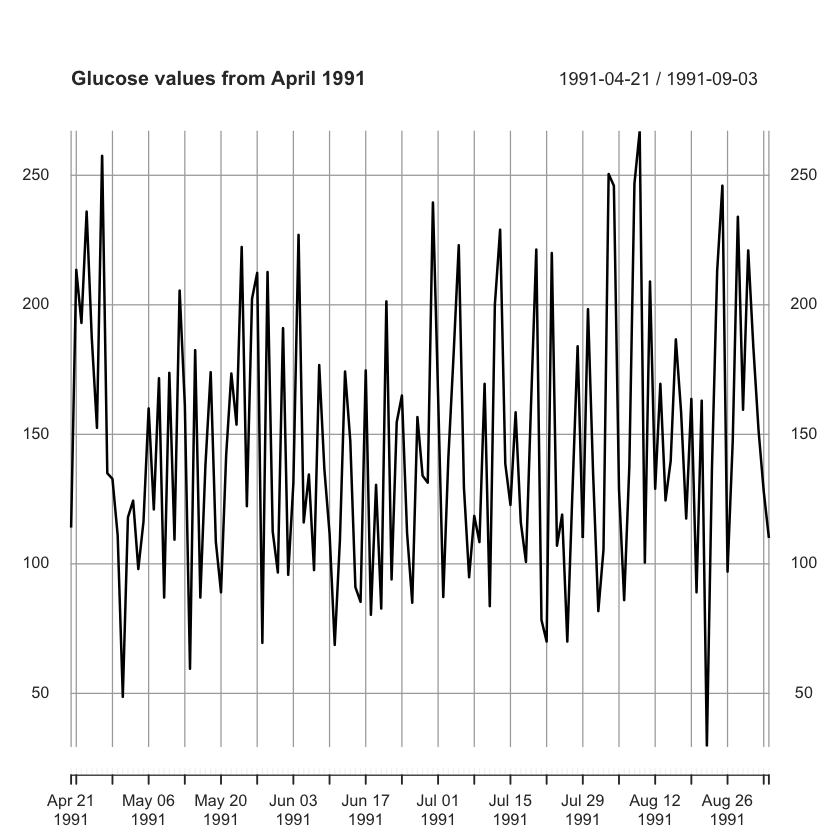

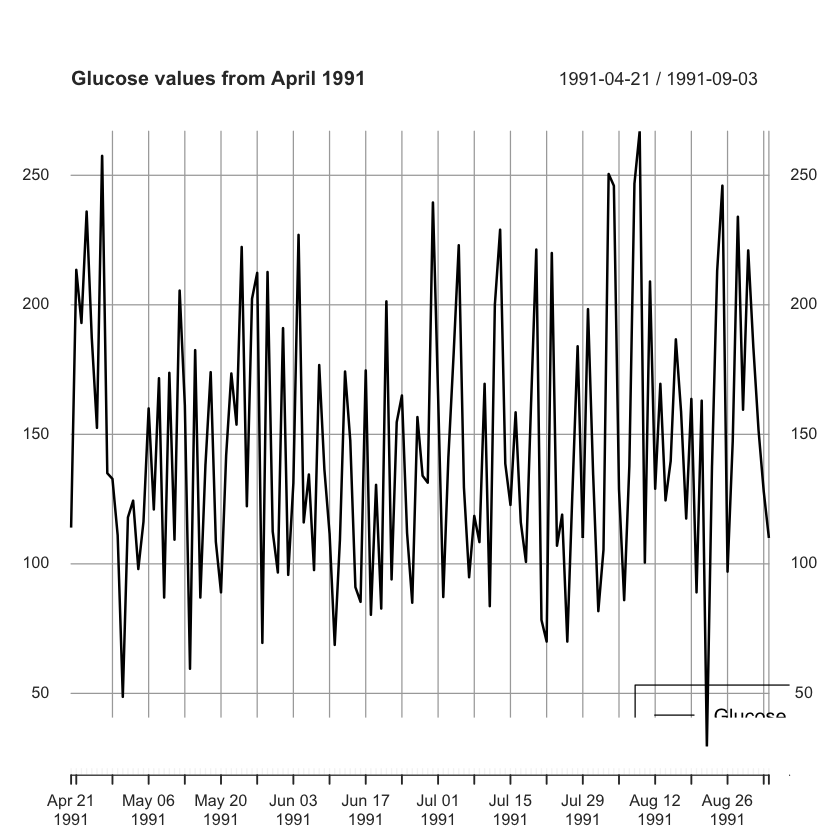

In [113]:
#Adding a second time series to an existing plot

plot(Glucose_xts2, main = "Glucose values from April 1991")

#Add second time series
lines(RegInsulin_xts, col = "red")

#Add a Y axis on RHS of chart
axis(side = 4, at = pretty(RegInsulin_xts))

#Add a legend in bottom right corner
legend(x = "bottomright", legend = c("Glucose", "Insulin"), col = c("black", "red"), lty = c(1, 1))

In [114]:
#USING PROPHET TO FORECAST

In [150]:
#Calculate average glucose readings for each day using "Date" column instead of Datetime
Glucose_data6 <- Glucose_data %>%
    mutate(day = floor_date(Date1, "day")) %>%
    group_by(day) %>%
    summarise(avg = mean(Glucose_dose))

head(Glucose_data6)
str(Glucose_data6)
class(Glucose_data6)
nrow(Glucose_data6)

day,avg
1991-04-21,114.0
1991-04-22,213.5
1991-04-23,193.0
1991-04-24,236.0
1991-04-25,187.0
1991-04-26,152.5


tibble [136 x 2] (S3: tbl_df/tbl/data.frame)
 $ day: Date[1:136], format: "1991-04-21" "1991-04-22" ...
 $ avg: num [1:136] 114 214 193 236 187 ...


[1] "tbl_df"     "tbl"        "data.frame"

[1] 136

In [158]:
#Data prep for use with Prophet
#1. Create copies of date and average columns in Glucose dataframe 

Glucose_copy <- Glucose_data6 %>%
    mutate(ds = day, y = avg) %>%
    select(-date)

head(Glucose_copy)

day,avg,ds,y
1991-04-21,114.0,1991-04-21,114.0
1991-04-22,213.5,1991-04-22,213.5
1991-04-23,193.0,1991-04-23,193.0
1991-04-24,236.0,1991-04-24,236.0
1991-04-25,187.0,1991-04-25,187.0
1991-04-26,152.5,1991-04-26,152.5


In [139]:
#Data Prep for use with Prophet
#2. Repurpose "day" column as index of the dataframe

Glucose_copy <- column_to_rownames(Glucose_copy, var = "day")

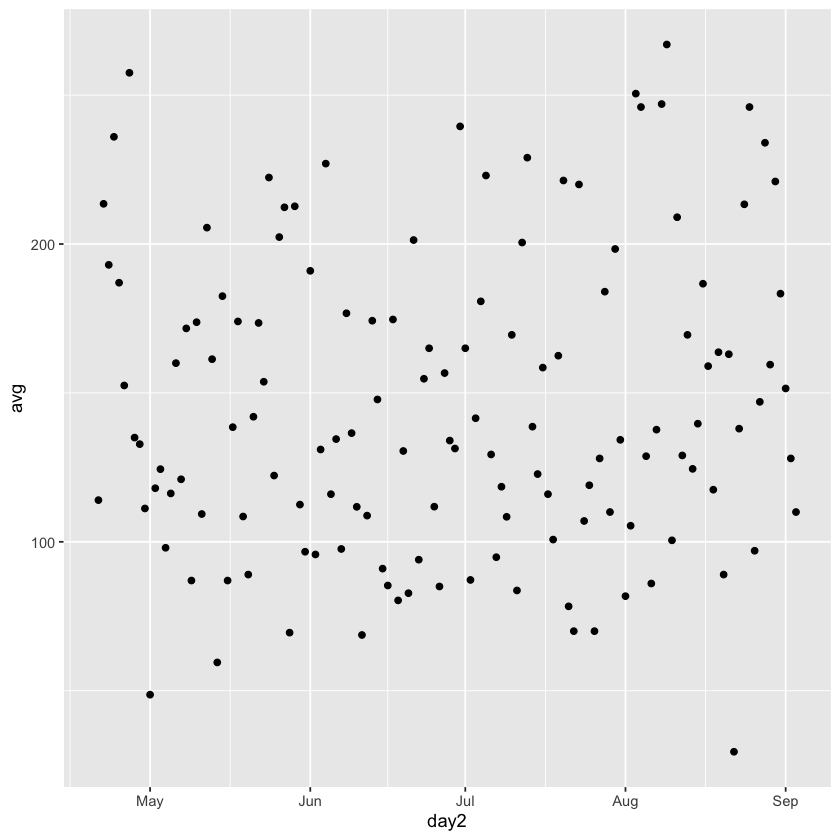

In [140]:
ggplot(Glucose_copy, aes(day2, avg)) + geom_point()

In [141]:
#Box-Cox to power transform (remove noise) prior to forecasting with the data - DIDN'T WORK, DELETE?

#BoxCox.lambda() to determine optimal lambda to use for transformation 

lam = BoxCox.lambda(Glucose_copy$avg, method = "loglik")
Glucose_copy$avg2 = BoxCox(Glucose_copy$avg, lam)
Glucose_copy.m <- melt(Glucose_copy, measure.vars = c("avg", "avg2"))

Warning message in melt(Glucose_copy, measure.vars = c("avg", "avg2")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(Glucose_copy). In the next version, this warning will become an error."Warning message:
"attributes are not identical across measure variables; they will be dropped"

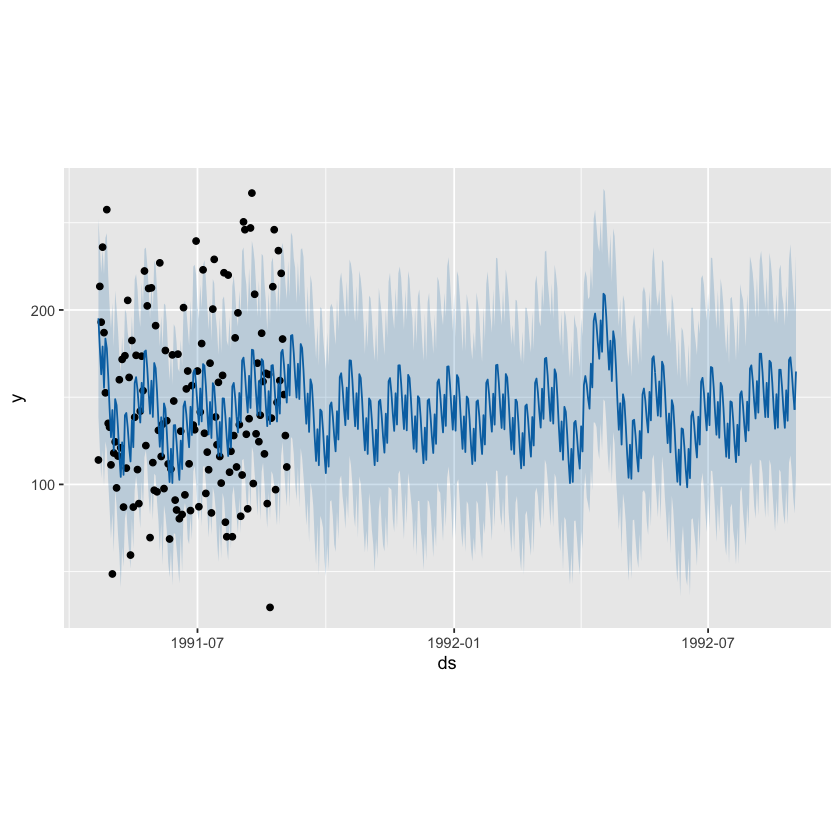

In [165]:
#Forecasting with Prophet

Glucose_prophet <- prophet(Glucose_copy, yearly.seasonality = TRUE, daily.seasonality = TRUE)

#Use Prophet to make future predictions
future <- make_future_dataframe(Glucose_prophet, periods = 365)

#Use predict() to make predictions for each row in the future dataframe
forecast <- predict(Glucose_prophet, future)

#Visualise the forecast
plot(Glucose_prophet, forecast)